<a href="https://colab.research.google.com/github/faddalashiru/Assessment-Data/blob/main/Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


INTRODUCTION


This analysis is of data on air quality which is very essential in addressing environmental challenges in efforts to improve public health. this project will go with the dataset entitled 'Assesment Data ' which contains the records of air pollutants and meteorological data from 26 citiesrecorded hourly, The project aims at arriving at a comprehensive solution involving data analysis, predictive modeling, and application development.The study will try to extract insight and identify patterns in an easy-to-use application in exploration and prediction through the use of programming-driven techniques,This project will not only focus on ethical consideration in data handling but also applies version control for an effective collaboration process.



In [ ]:
# importing the necessary libraries for data analysis
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd '/content/drive/MyDrive/Assessment Data-20251029'

/content/drive/MyDrive/Assessment Data-20251029


In [ ]:
%ls

Ahmedabad_data.csv       Chennai_data.csv     Kochi_data.csv
Aizawl_data.csv          Coimbatore_data.csv  Kolkata_data.csv
all_cities_combined.csv  Delhi_data.csv       Lucknow_data.csv
Amaravati_data.csv       Ernakulam_data.csv   Mumbai_data.csv
Amritsar_data.csv        Gurugram_data.csv    Patna_data.csv
Bengaluru_data.csv       Guwahati_data.csv    Shillong_data.csv
Bhopal_data.csv          Hyderabad_data.csv   Talcher_data.csv
Brajrajnagar_data.csv    Jaipur_data.csv      Thiruvananthapuram_data.csv
Chandigarh_data.csv      Jorapokhar_data.csv  Visakhapatnam_data.csv


In [ ]:
dataframes = []
drive_path = os.getcwd()
for filename in os.listdir(drive_path):
    if filename.endswith('.csv'):  # Check if the file is a CSV file
        file_path = os.path.join(drive_path, filename)
        df = pd.read_csv(file_path)  # Read the CSV file into a DataFrame
        dataframes.append(df)  # Add the DataFrame to the list

In [ ]:
df = pd.concat(dataframes, ignore_index=True)
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ernakulam,22/01/2020,37.48,80.65,127.81,7.76,135.57,101.97,1.94,3.34,NaN,0.64,1.01,0.12,NaN,NaN
1,Ernakulam,23/01/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Ernakulam,24/01/2020,41.13,68.71,125.76,7.95,133.71,102.66,1.12,3.46,NaN,0.68,1.87,0.31,NaN,NaN
3,Ernakulam,25/01/2020,53.00,84.58,126.22,7.80,134.02,104.05,1.17,3.48,NaN,0.90,1.93,0.19,154.0,Moderate
4,Ernakulam,26/01/2020,58.31,85.47,125.14,7.95,133.09,103.20,1.20,3.54,NaN,1.15,1.83,0.18,153.0,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59057,Visakhapatnam,27/06/2020,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
59058,Visakhapatnam,28/06/2020,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
59059,Visakhapatnam,29/06/2020,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
59060,Visakhapatnam,30/06/2020,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [ ]:
df.head(5)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ernakulam,22/01/2020,37.48,80.65,127.81,7.76,135.57,101.97,1.94,3.34,NaN,0.64,1.01,0.12,NaN,NaN
1,Ernakulam,23/01/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Ernakulam,24/01/2020,41.13,68.71,125.76,7.95,133.71,102.66,1.12,3.46,NaN,0.68,1.87,0.31,NaN,NaN
3,Ernakulam,25/01/2020,53.00,84.58,126.22,7.80,134.02,104.05,1.17,3.48,NaN,0.90,1.93,0.19,154.0,Moderate
4,Ernakulam,26/01/2020,58.31,85.47,125.14,7.95,133.09,103.20,1.20,3.54,NaN,1.15,1.83,0.18,153.0,Moderate


In [ ]:
df.tail(5)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
59057,Visakhapatnam,27/06/2020,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
59058,Visakhapatnam,28/06/2020,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
59059,Visakhapatnam,29/06/2020,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
59060,Visakhapatnam,30/06/2020,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory
59061,Visakhapatnam,01/07/2020,15.00,66.00,0.40,26.85,14.05,5.20,0.59,2.10,17.05,NaN,NaN,NaN,50.0,Good


In [ ]:
# check the number of columns
print(f"The Data has {df.shape[0]} total records and {df.shape[1]} columns ")

The Data has 59062 total records and 16 columns 


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59062 entries, 0 to 59061
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        59062 non-null  object 
 1   Date        59062 non-null  object 
 2   PM2.5       49866 non-null  float64
 3   PM10        36782 non-null  float64
 4   NO          51898 non-null  float64
 5   NO2         51892 non-null  float64
 6   NOx         50692 non-null  float64
 7   NH3         38406 non-null  float64
 8   CO          54944 non-null  float64
 9   SO2         51354 non-null  float64
 10  O3          51018 non-null  float64
 11  Benzene     47816 non-null  float64
 12  Toluene     42980 non-null  float64
 13  Xylene      22844 non-null  float64
 14  AQI         49700 non-null  float64
 15  AQI_Bucket  49700 non-null  object 
dtypes: float64(13), object(3)
memory usage: 7.2+ MB


In [ ]:
df.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [ ]:
city = df['City'].value_counts()
print(f'Total number of citys in the dataset : {len(city)}')
city

Total number of citys in the dataset : 26


,count
City,
Ahmedabad,4018
Delhi,4018
Lucknow,4018
Mumbai,4018
Bengaluru,4018
Chennai,4018
Hyderabad,4012
Patna,3716
Gurugram,3358


In [ ]:
df['City'].unique()

array(['Ernakulam', 'Ahmedabad', 'Delhi', 'Gurugram', 'Chandigarh',
       'Jaipur', 'Guwahati', 'Aizawl', 'Coimbatore', 'Brajrajnagar',
       'Hyderabad', 'Bhopal', 'Chennai', 'Amritsar', 'Amaravati',
       'Bengaluru', 'Kolkata', 'Mumbai', 'Patna', 'Lucknow', 'Jorapokhar',
       'Shillong', 'Kochi', 'Talcher', 'Thiruvananthapuram',
       'Visakhapatnam'], dtype=object)

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['Months'] = df['Date'].dt.month_name()
df['Months'].unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

In [ ]:
def missing_values_table(df_input):
    # Total missing values
    mis_val = df_input.isnull().sum()

    # Percentage of missing values
    mis_val_percent = 100 * mis_val / len(df_input)

    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

    mis_val_table = mis_val_table.rename(columns={0: 'Missing Values', 1: '% of Total Values'})

    # Sort the table by percentage of missing descending
    mis_val_table = mis_val_table.sort_values('% of Total Values', ascending=False)

    return mis_val_table

missing_values = missing_values_table(df)
display(missing_values.style.background_gradient(cmap='Blues'))

,Missing Values,% of Total Values
Xylene,36218,61.322001
PM10,22280,37.723071
NH3,20656,34.973418
Toluene,16082,27.229014
Benzene,11246,19.041008
AQI_Bucket,9362,15.851139
AQI,9362,15.851139
PM2.5,9196,15.570079
NOx,8370,14.171549
O3,8044,13.619586


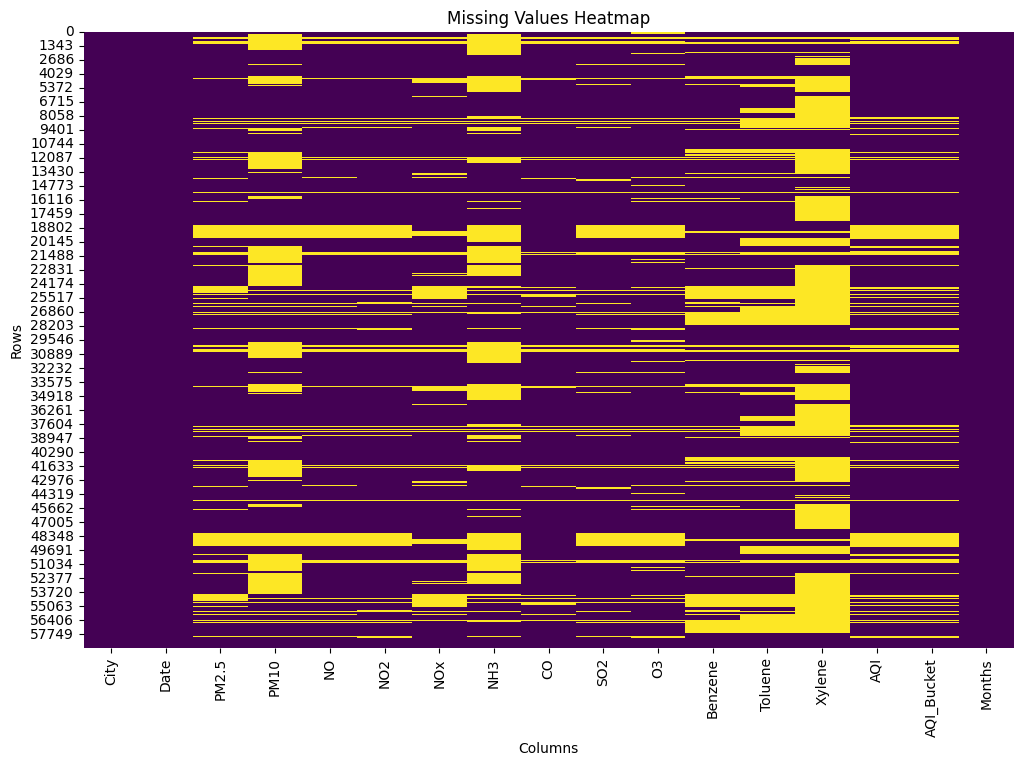

In [ ]:
# Visualize the missing values using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

In [ ]:
# check any duplicated entries
print (f'Total number of duplicated entries : {df.duplicated().sum()}')

Total number of duplicated entries : 29531


In [ ]:
missing_values_per_city = df.groupby('City').apply(lambda x: x.isnull().sum())
missing_values_per_city

/tmp/ipython-input-410150535.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_values_per_city = df.groupby('City').apply(lambda x: x.isnull().sum())


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,Months
City,,,,,,,,,,,,,,,,,
Ahmedabad,0,0,1256,3204,1218,1216,1188,4018,1218,1280,1370,966,966,968,1350,1350,0
Aizawl,0,0,4,2,0,0,0,0,0,0,18,30,30,226,4,4,0
Amaravati,0,0,118,110,110,110,110,110,194,130,110,150,150,538,220,220,0
Amritsar,0,0,256,126,186,88,578,84,152,336,230,390,424,426,190,190,0
Bengaluru,0,0,292,720,12,12,8,406,22,12,288,532,186,4018,198,198,0
Bhopal,0,0,18,18,18,18,18,18,18,18,18,578,578,578,22,22,0
Brajrajnagar,0,0,370,346,486,468,350,452,300,386,406,346,1876,1876,450,450,0
Chandigarh,0,0,30,0,8,8,8,20,0,0,0,0,0,0,10,10,0
Chennai,0,0,234,3414,72,72,72,924,50,72,98,570,506,4018,250,250,0


In [ ]:
print('Total missng values per city')
print(df.groupby('City').apply(lambda x: x.isnull().sum().sum()))

Total missng values per city
City
Ahmedabad             21568
Aizawl                  318
Amaravati              2380
Amritsar               3656
Bengaluru              6904
Bhopal                 1940
Brajrajnagar           8562
Chandigarh               94
Chennai               10602
Coimbatore             1386
Delhi                  2174
Ernakulam               550
Gurugram              13686
Guwahati               2066
Hyderabad              3166
Jaipur                 2832
Jorapokhar            17206
Kochi                   712
Kolkata                1632
Lucknow               12164
Mumbai                28402
Patna                 12428
Shillong               2146
Talcher                8028
Thiruvananthapuram     7610
Visakhapatnam          4764
dtype: int64


/tmp/ipython-input-3551611988.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  print(df.groupby('City').apply(lambda x: x.isnull().sum().sum()))


In [ ]:
df[['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','Xylene','AQI','AQI_Bucket']] = df[['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','Xylene','AQI','AQI_Bucket']].ffill()

In [ ]:
# Merging date, month, into a single datetime column
# df['Date'] = pd.to_datetime(df[['year', 'month', 'date']], format ='mixed')

# Drop the original year, month, and day columns
#df.drop(['year', 'month', 'datae'], axis=1, inplace=True)
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,Months
0,Ernakulam,2020-01-22,37.48,80.65,127.81,7.76,135.57,101.97,1.94,3.34,NaN,0.64,1.01,0.12,NaN,NaN,January
1,Ernakulam,2020-01-23,37.48,80.65,127.81,7.76,135.57,101.97,1.94,3.34,NaN,0.64,1.01,0.12,NaN,NaN,January
2,Ernakulam,2020-01-24,41.13,68.71,125.76,7.95,133.71,102.66,1.12,3.46,NaN,0.68,1.87,0.31,NaN,NaN,January
3,Ernakulam,2020-01-25,53.00,84.58,126.22,7.80,134.02,104.05,1.17,3.48,NaN,0.90,1.93,0.19,154.0,Moderate,January
4,Ernakulam,2020-01-26,58.31,85.47,125.14,7.95,133.09,103.20,1.20,3.54,NaN,1.15,1.83,0.18,153.0,Moderate,January


In [ ]:
# Reordering the columns to place 'datetime' at first index position
columns = df.columns.tolist()
columns.insert(0, columns.pop(columns.index('Date')))
df = df[columns]
df

,Date,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,Months
0,2020-01-22,Ernakulam,37.48,80.65,127.81,7.76,135.57,101.97,1.94,3.34,NaN,0.64,1.01,0.12,NaN,NaN,January
1,2020-01-23,Ernakulam,37.48,80.65,127.81,7.76,135.57,101.97,1.94,3.34,NaN,0.64,1.01,0.12,NaN,NaN,January
2,2020-01-24,Ernakulam,41.13,68.71,125.76,7.95,133.71,102.66,1.12,3.46,NaN,0.68,1.87,0.31,NaN,NaN,January
3,2020-01-25,Ernakulam,53.00,84.58,126.22,7.80,134.02,104.05,1.17,3.48,NaN,0.90,1.93,0.19,154.0,Moderate,January
4,2020-01-26,Ernakulam,58.31,85.47,125.14,7.95,133.09,103.20,1.20,3.54,NaN,1.15,1.83,0.18,153.0,Moderate,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59057,2020-06-27,Visakhapatnam,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good,June
59058,2020-06-28,Visakhapatnam,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory,June
59059,2020-06-29,Visakhapatnam,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory,June
59060,2020-06-30,Visakhapatnam,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory,June


In [ ]:
print("Total missing values per City:")
print(df.groupby('City').apply(lambda x: x.isnull().sum().sum()))

Total missing values per City:
City
Ahmedabad               0
Aizawl                  0
Amaravati               0
Amritsar                0
Bengaluru               0
Bhopal                  0
Brajrajnagar            0
Chandigarh              0
Chennai                 0
Coimbatore              0
Delhi                   0
Ernakulam             168
Gurugram                0
Guwahati                0
Hyderabad               0
Jaipur                  0
Jorapokhar              0
Kochi                   0
Kolkata                 0
Lucknow                 0
Mumbai                  0
Patna                   0
Shillong                0
Talcher                 0
Thiruvananthapuram      0
Visakhapatnam           0
dtype: int64


/tmp/ipython-input-2279394426.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  print(df.groupby('City').apply(lambda x: x.isnull().sum().sum()))


<Axes: >

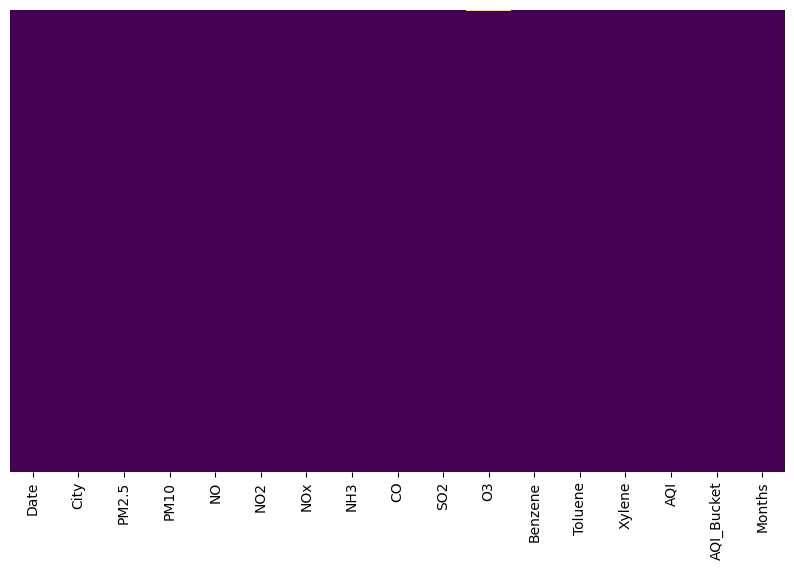

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis',yticklabels=False)

In [ ]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,59062,2018-05-14 05:40:15.807118080,2015-01-01 00:00:00,2017-04-16 00:00:00,2018-08-05 00:00:00,2019-09-03 00:00:00,2020-07-01 00:00:00,NaN
PM2.5,59062.0,64.528982,0.04,25.9425,44.99,78.62,949.99,64.9394
PM10,59062.0,92.524736,0.01,31.58,64.81,127.1075,1000.0,85.776108
NO,59062.0,17.13764,0.02,5.92,9.33,18.56,390.68,23.272911
NO2,59062.0,26.733487,0.01,10.44,19.71,35.03,362.21,23.779357
NOx,59062.0,32.383861,0.0,11.6425,22.01,38.66,467.63,33.978198
NH3,59062.0,22.164207,0.01,6.96,14.45,28.9175,352.89,26.118181
CO,59062.0,2.292698,0.0,0.5,0.91,1.49,175.81,6.824217
SO2,59062.0,15.620076,0.01,5.29,8.98,15.91,193.86,20.609828
O3,58900.0,33.34954,0.01,17.05,29.48,44.27,257.73,21.952252


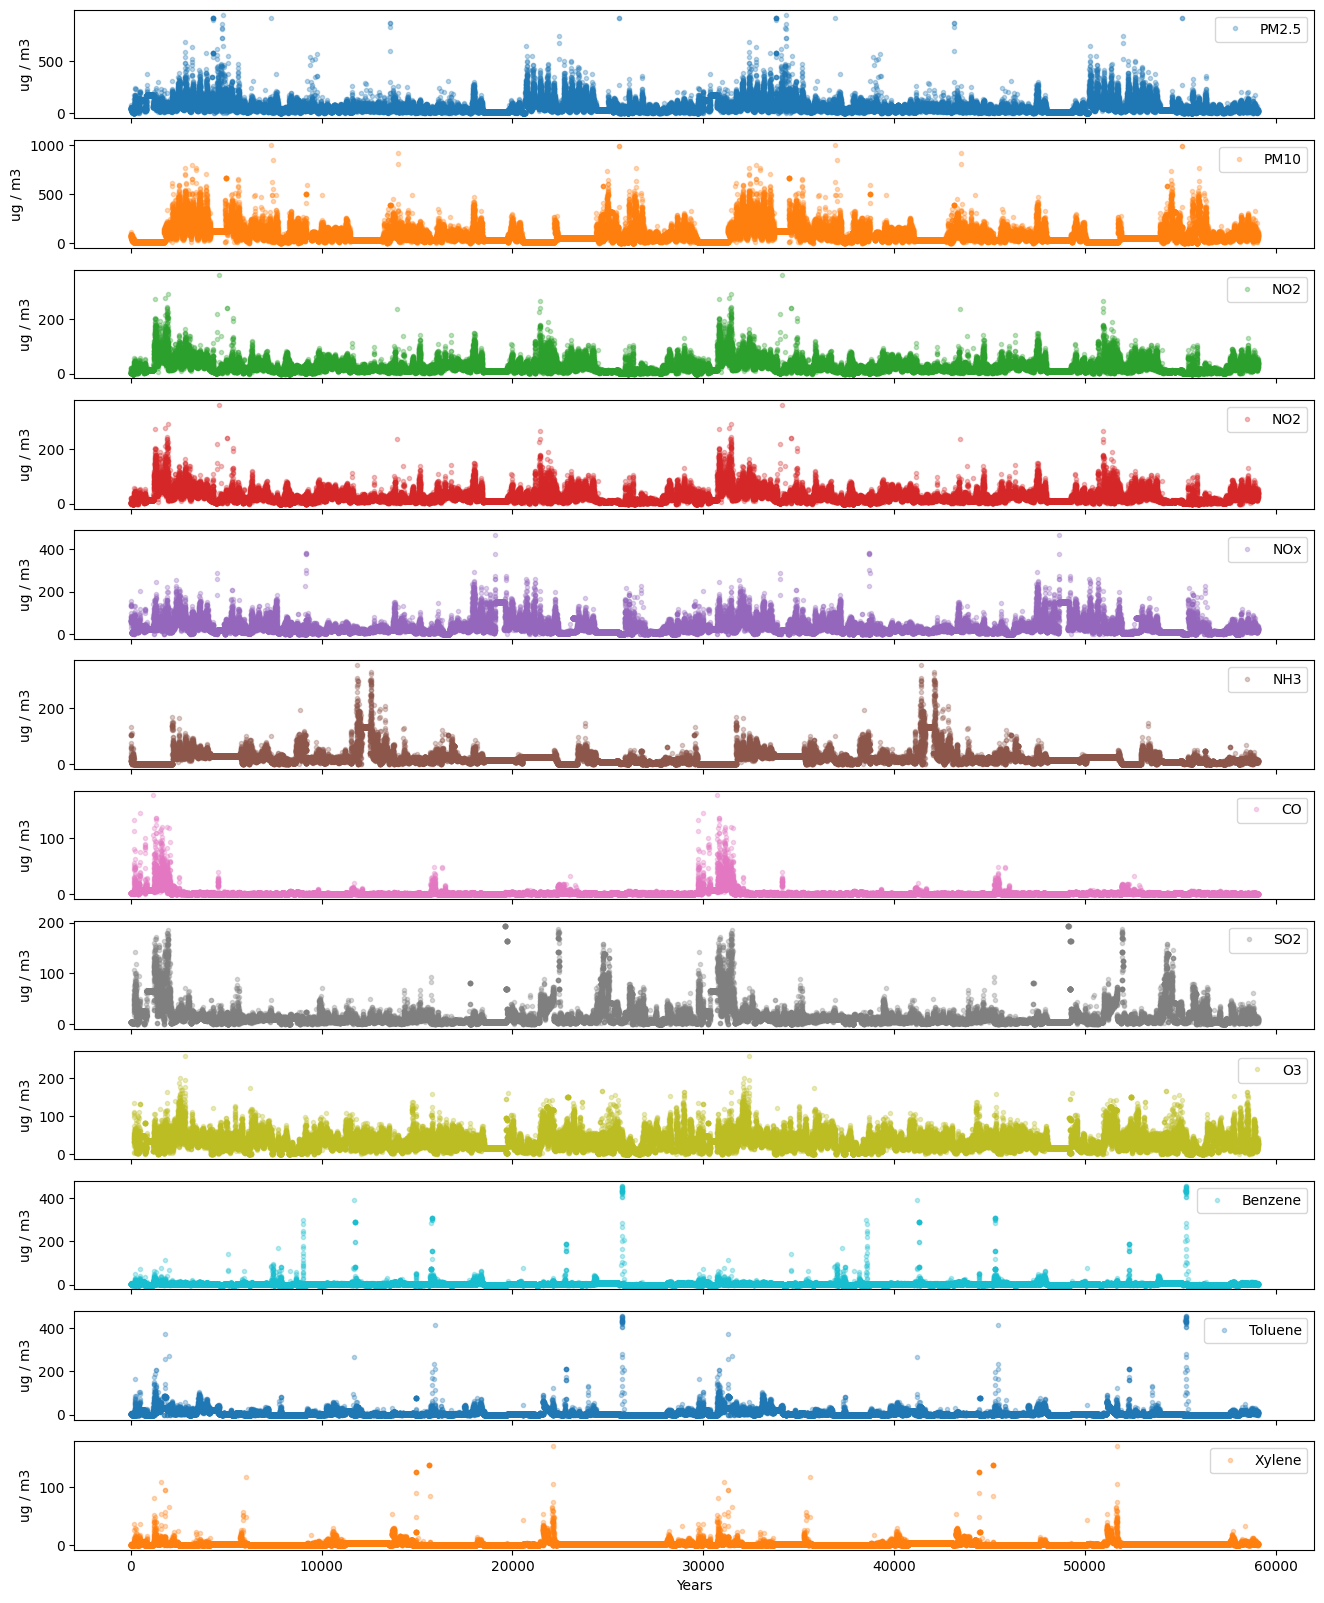

In [ ]:
pollutants = ['PM2.5', 'PM10', 'NO2','NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']
axes = df[pollutants].plot(marker='.', alpha=0.3, linestyle='None', figsize=(16, 20), subplots=True)
for ax in axes:
    ax.set_xlabel('Years')
    ax.set_ylabel('ug / m3')

In [ ]:
city_stats = df.groupby('City')[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3','CO','SO2','O3','Benzene','Toluene',]].mean().reset_index()

import plotly.express as px

# Melt the DataFrame to create a 'Pollutant' column
station_stats_melted = pd.melt(city_stats,
                               id_vars=['City'],
                               value_vars=['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3','CO','SO2','O3','Benzene','Toluene'],
                               var_name='Pollutant',
                               value_name='Average Concentration')

# Create the stacked bar chart
fig_station = px.bar(station_stats_melted,
                     x='City',
                     y='Average Concentration',
                     color='Pollutant', # Use 'Pollutant' for color differentiation
                     title='Average Pollution Levels by Station (Stacked)',
                     labels={'City': 'City', 'Average Concentration': 'Average Concentration'},
                     barmode='stack')

fig_station.show()

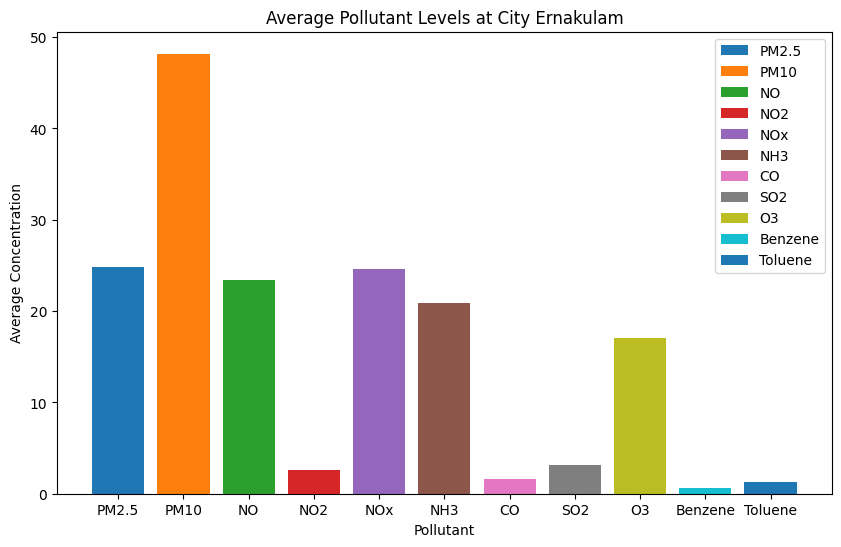

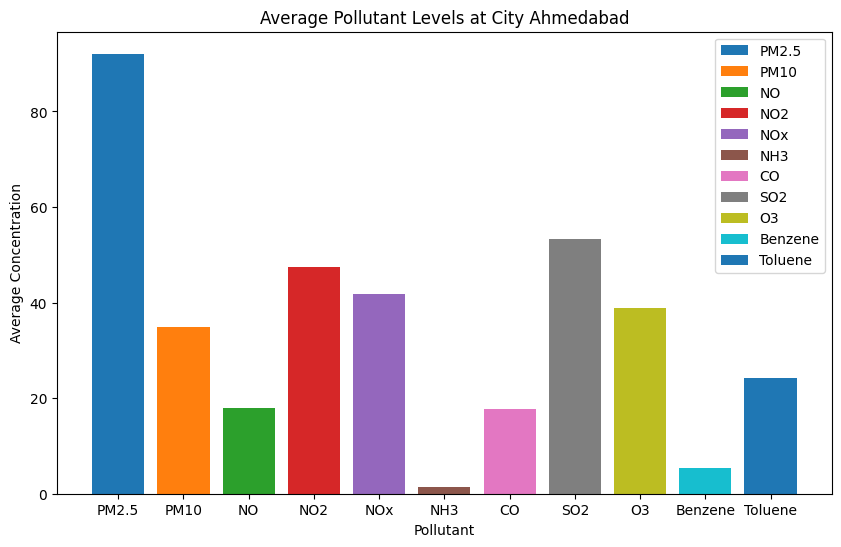

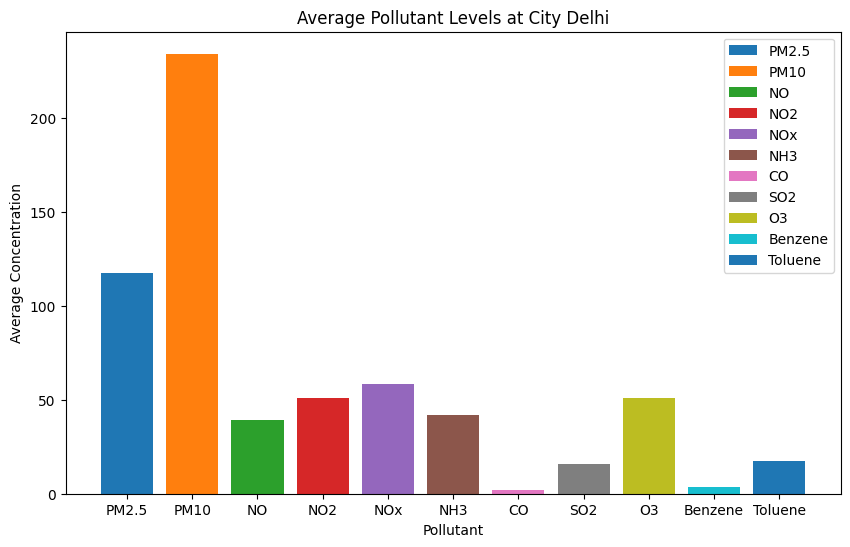

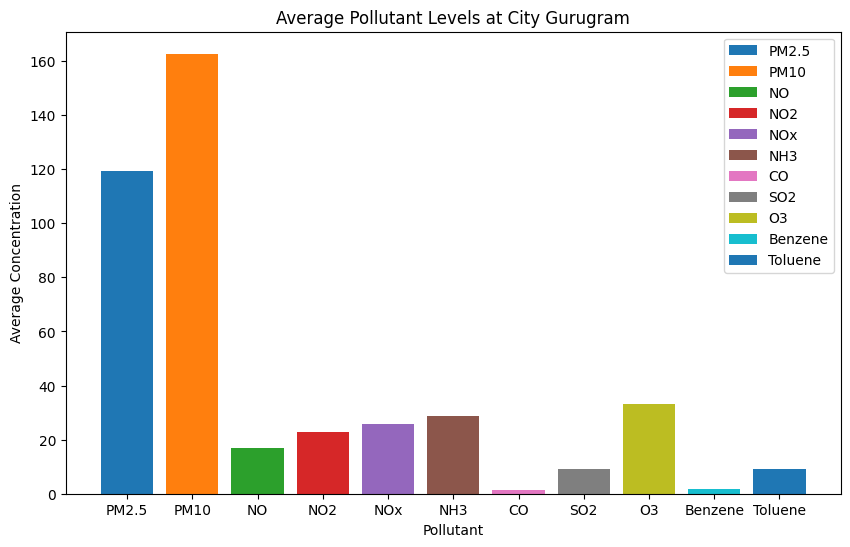

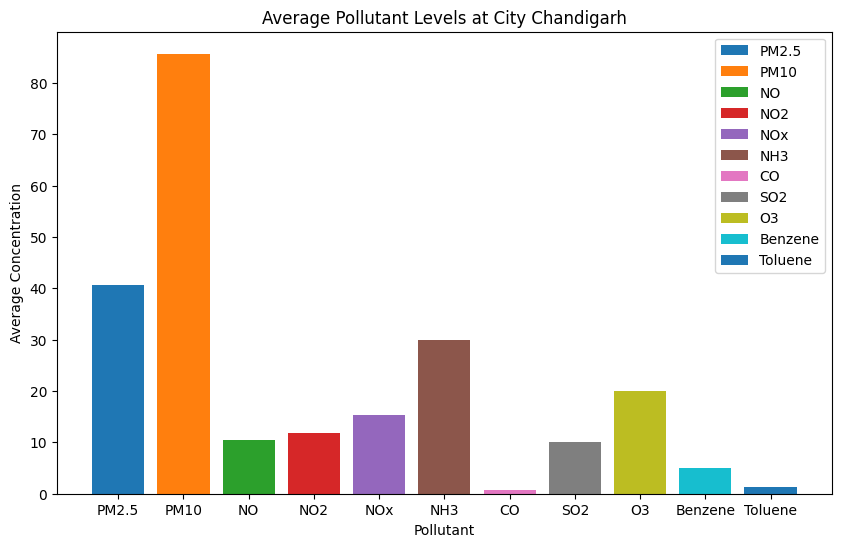

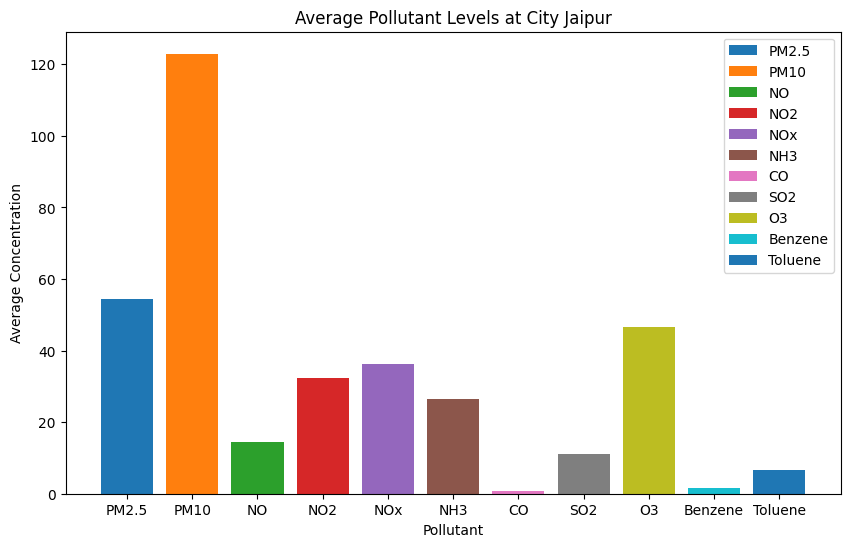

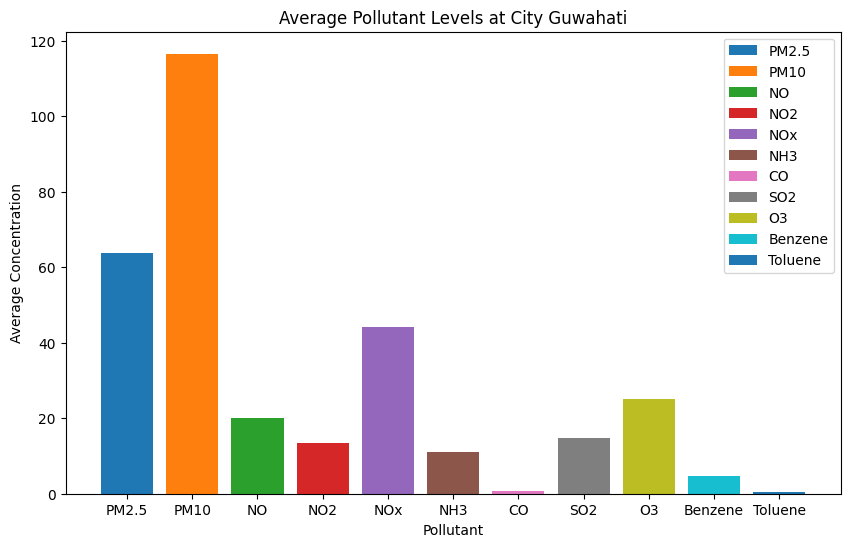

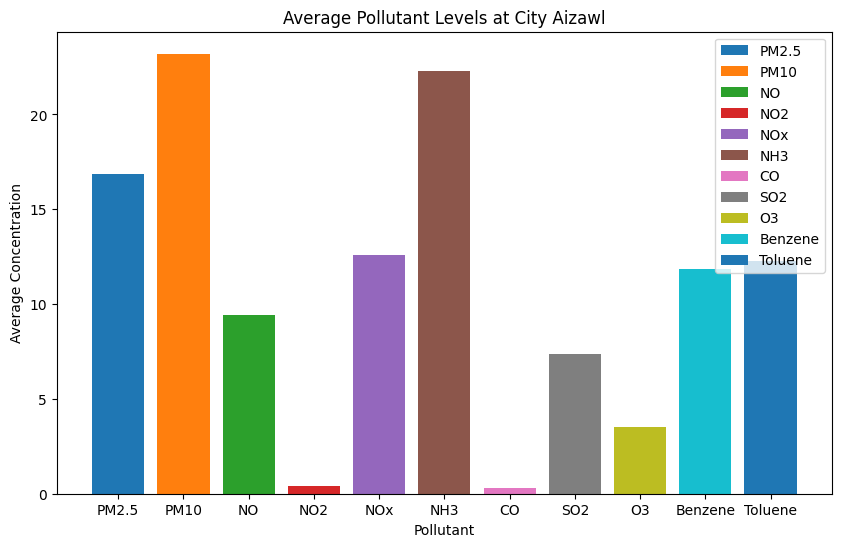

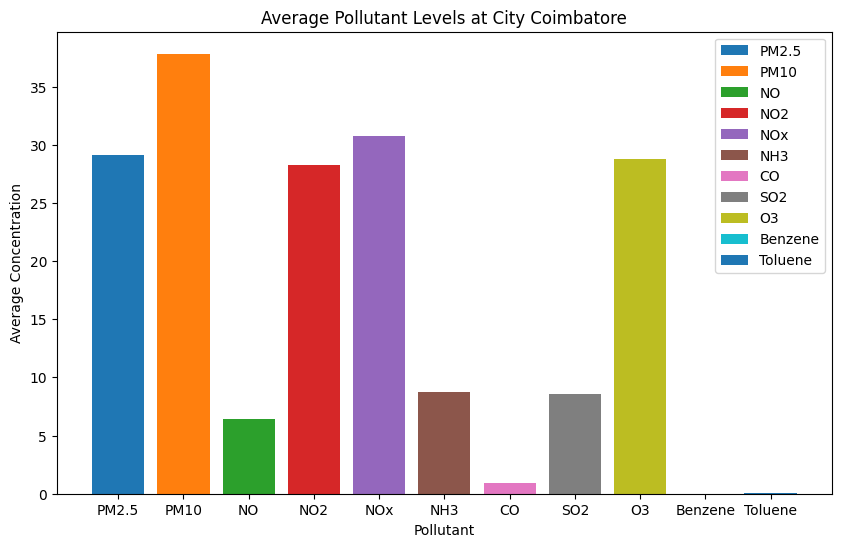

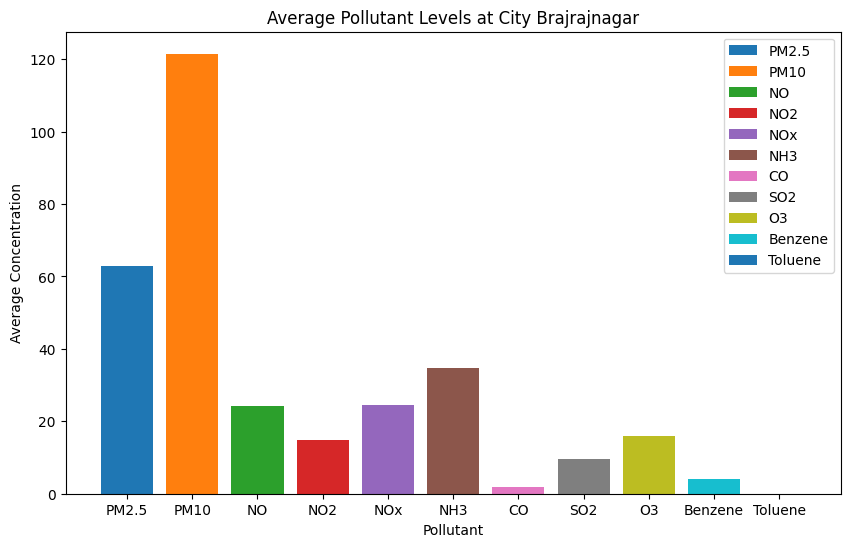

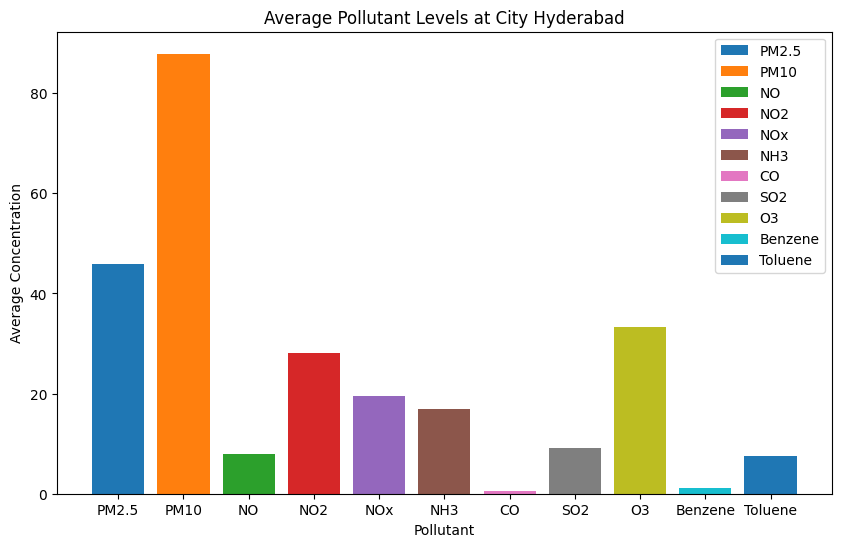

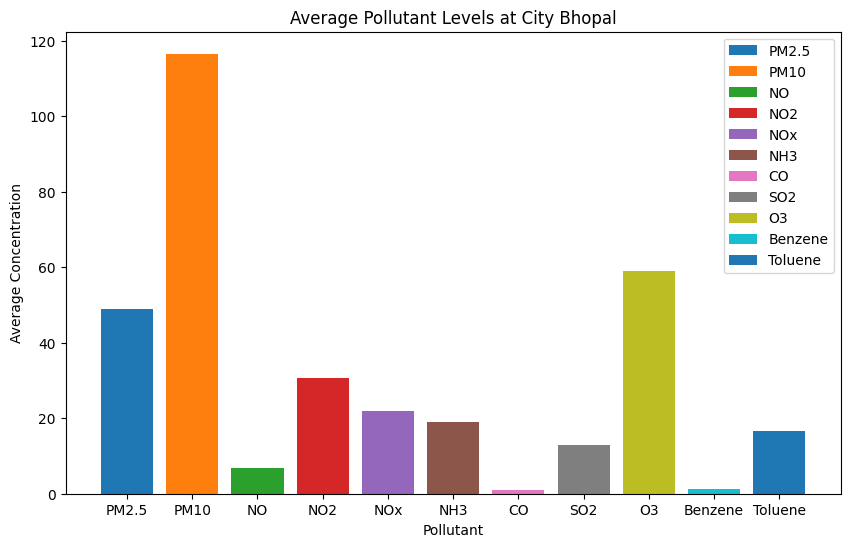

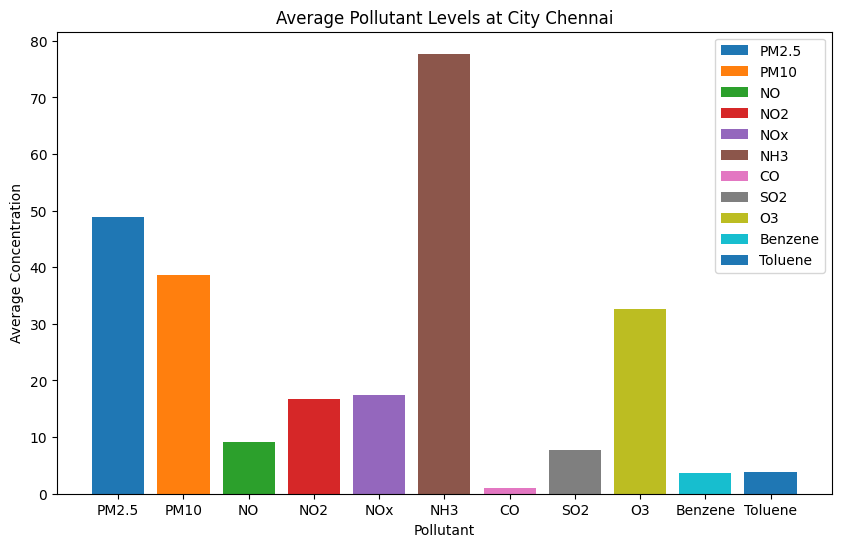

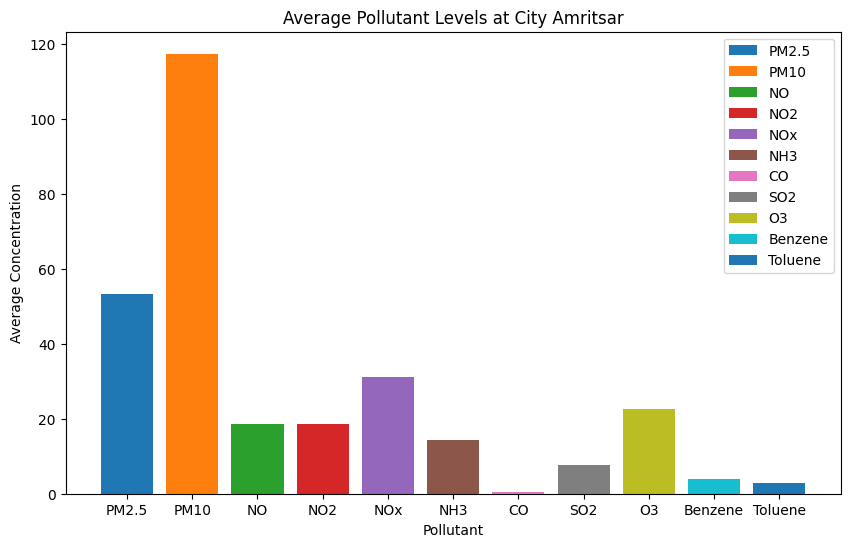

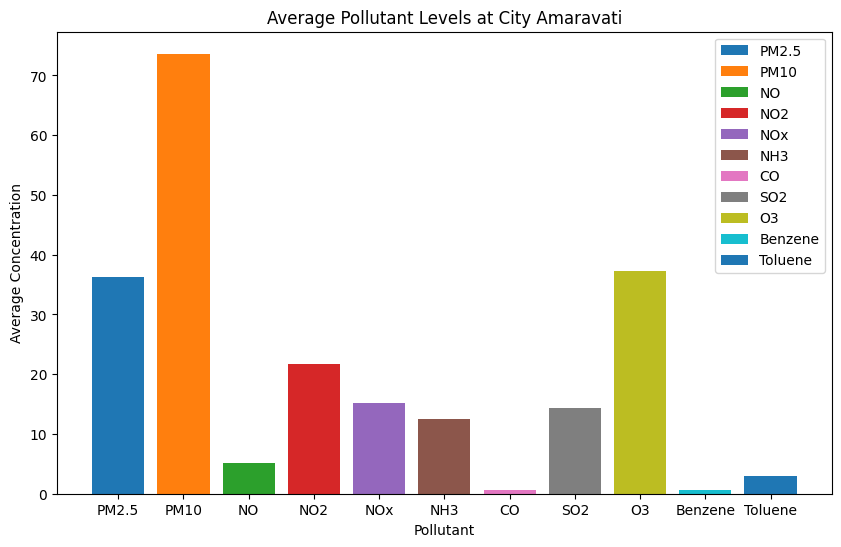

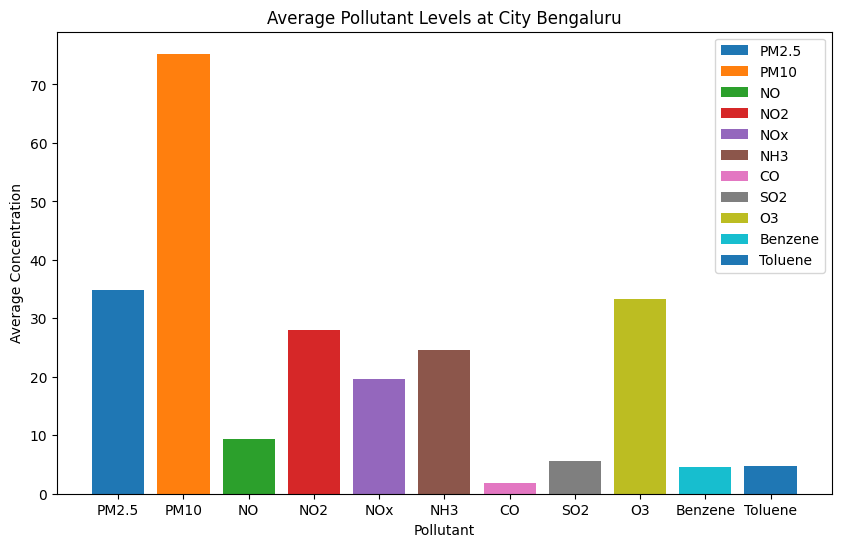

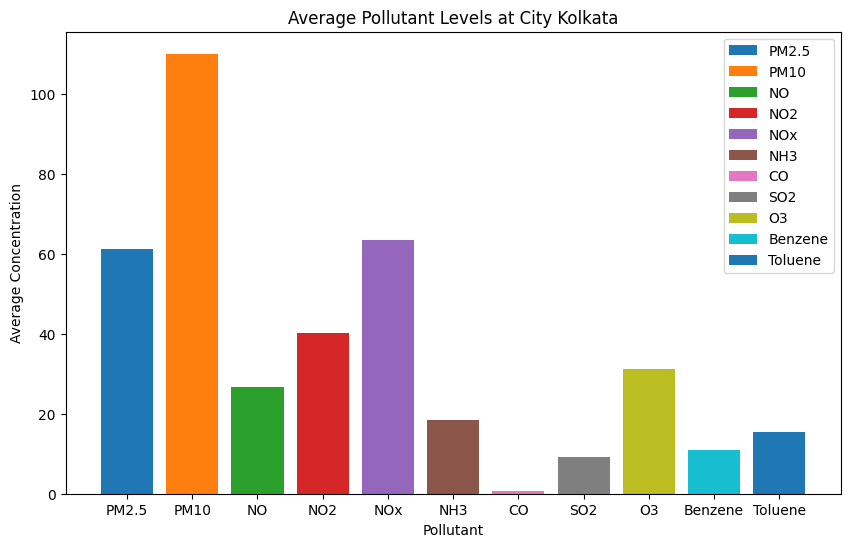

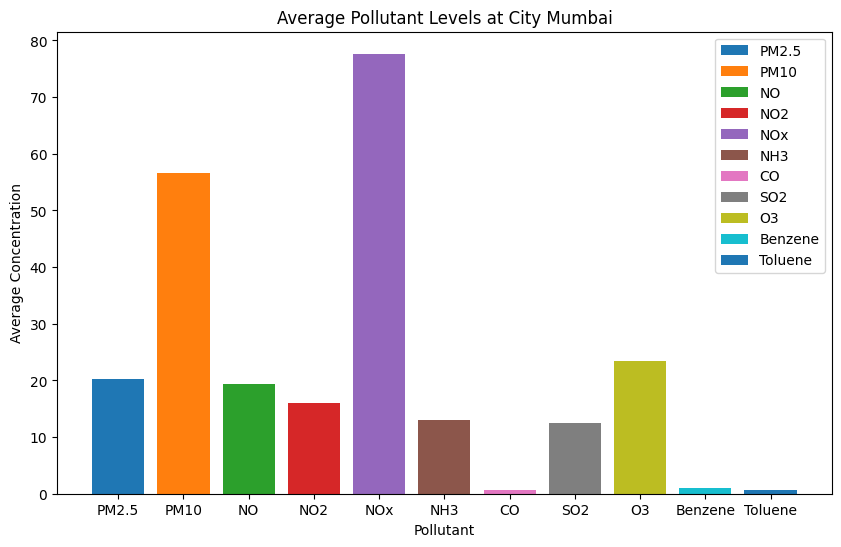

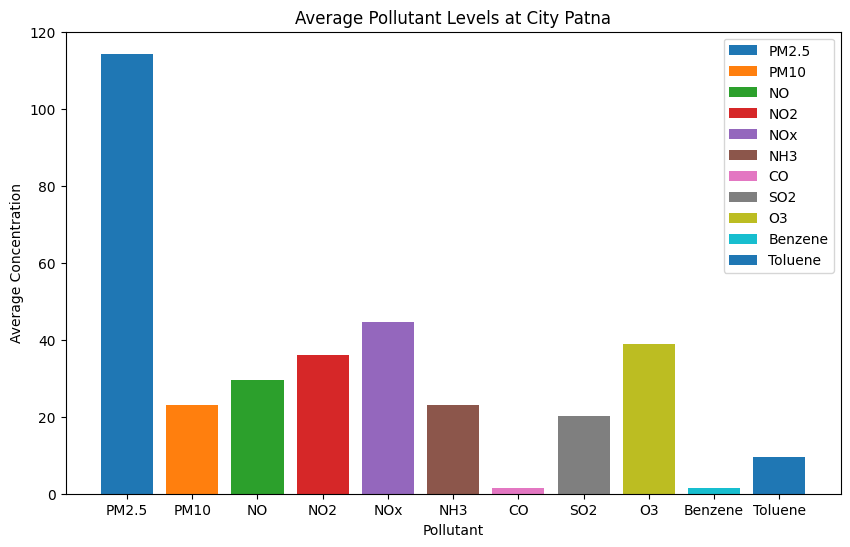

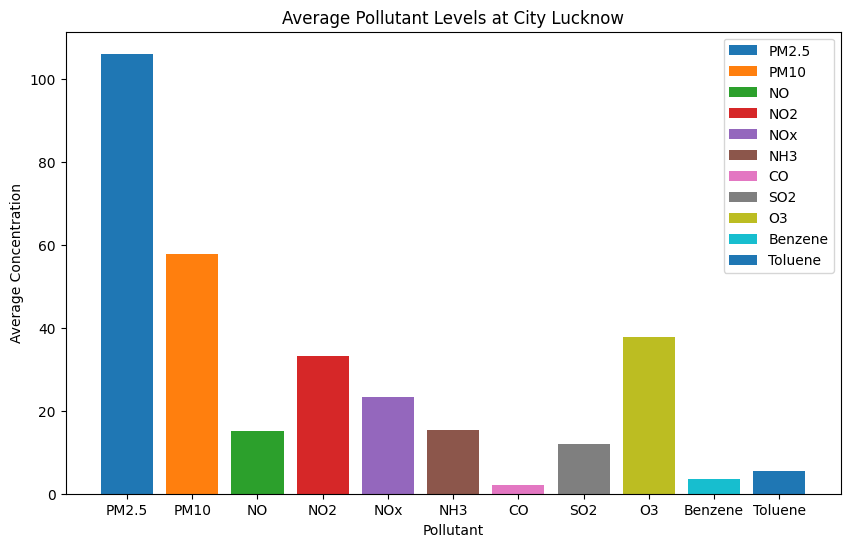

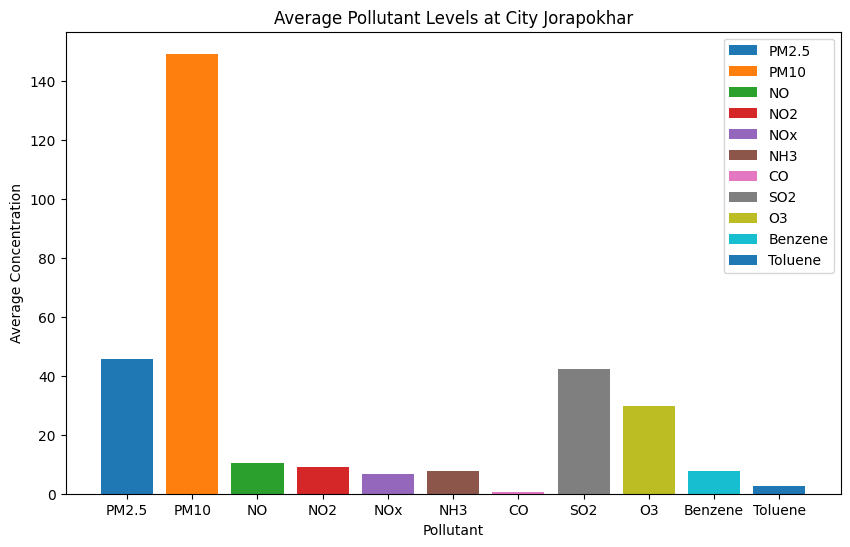

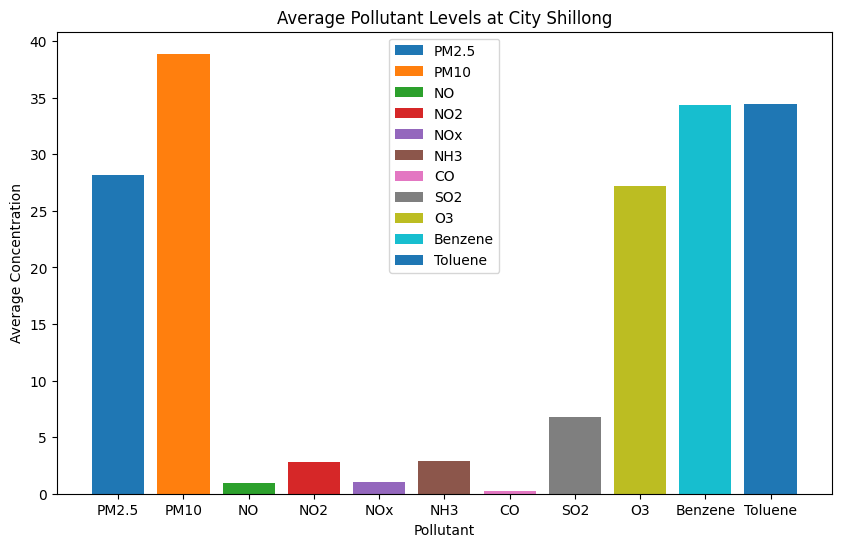

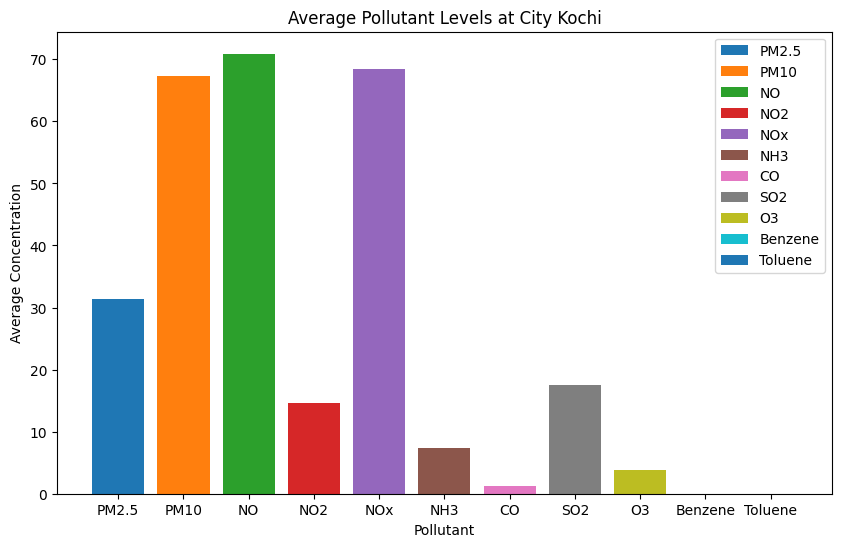

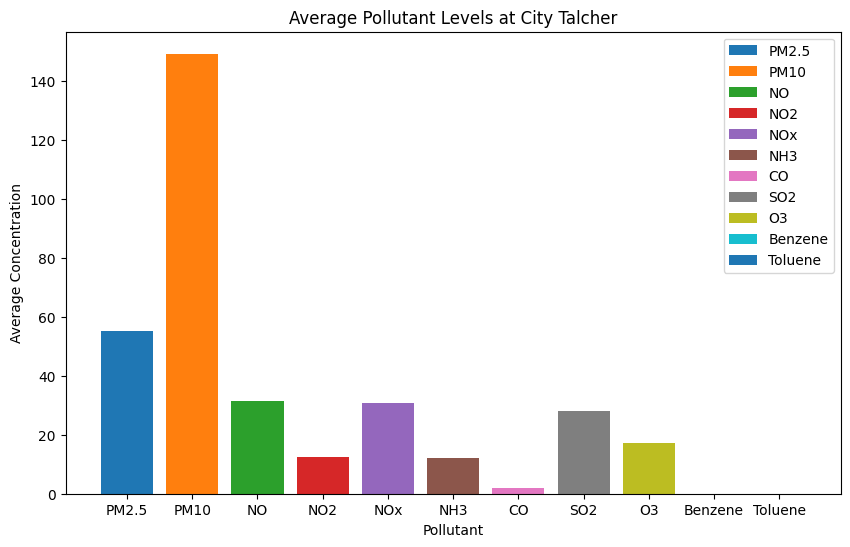

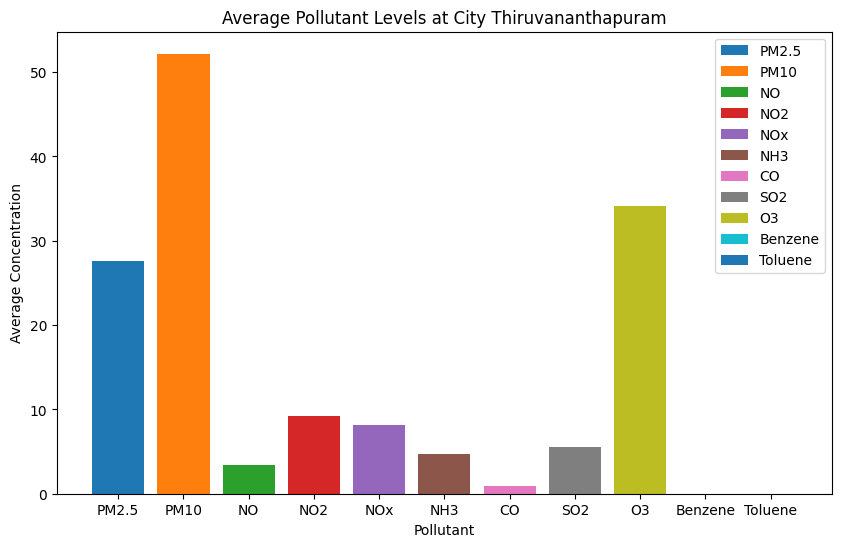

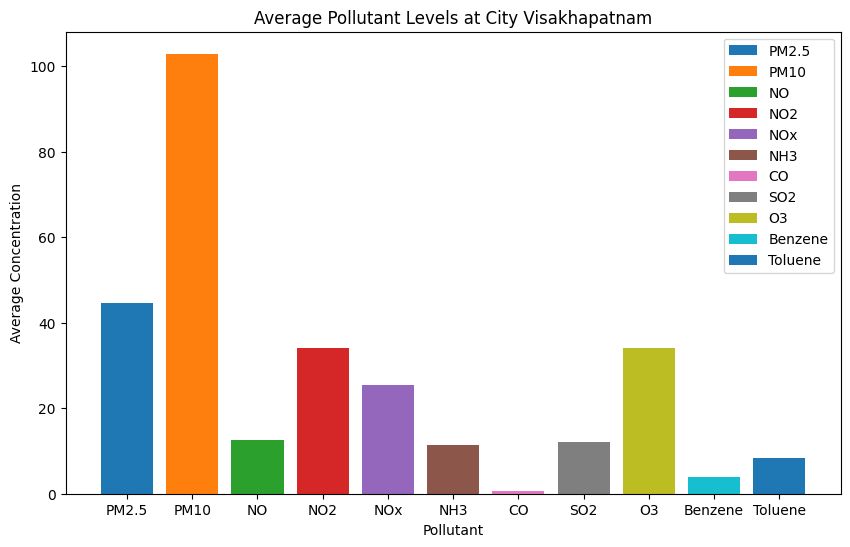

In [ ]:
import matplotlib.pyplot as plt

City = df['City'].unique()
pollutants = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3','CO','SO2','O3','Benzene','Toluene']

for City in City:
    City_data = df[df['City'] == City]
    plt.figure(figsize=(10, 6))
    for pollutant in pollutants:
        plt.bar(pollutant, City_data[pollutant].mean(), label=pollutant)
    plt.title(f'Average Pollutant Levels at City {City}')
    plt.xlabel('Pollutant')
    plt.ylabel('Average Concentration')
    plt.legend()
    plt.show()

In [ ]:
def max_polluted_City(selected_pollutants):
    x1 = df[[selected_pollutants,'City']].groupby(["City"]).mean().sort_values(by=selected_pollutants,ascending=False).reset_index()
    x1[selected_pollutants] = round(x1[selected_pollutants],2)
    return x1[:6].style.background_gradient(cmap='OrRd')

In [ ]:
from IPython.display import display_html

def display_side_by_side(*args):
    # Convert each DataFrame's Styler object to HTML and join them together
    html_str = ''
    for df in args:
        html_str += df._repr_html_()  # Use _repr_html_ to get the HTML representation
    display_html(html_str.replace('table', 'table style="display:inline;margin-right:20px;"'), raw=True)

pm2_5 = max_polluted_City('PM2.5')
pm10 = max_polluted_City('PM10')
no = max_polluted_City('NO')
no2 = max_polluted_City('NO2')
nox = max_polluted_City('NOx')
nh3 =max_polluted_City('NH3')
co = max_polluted_City('CO')
so2 = max_polluted_City('SO2')
o3 = max_polluted_City('O3')
ben = max_polluted_City('Benzene')
to = max_polluted_City('Toluene')
x = max_polluted_City('Xylene')
#air_qua=max_polluted_City('AQI')

# Display the DataFrames side by side
display_side_by_side(pm2_5, pm10, no2, no2, nox, nh3, co, so2, o3, ben, to, x)

,City,PM2.5
0,Gurugram,119.230000
1,Delhi,117.100000
2,Patna,114.370000
3,Lucknow,106.020000
4,Ahmedabad,92.070000
5,Guwahati,63.860000
,City,PM10
0,Delhi,233.950000
1,Gurugram,162.660000
2,Talcher,149.290000


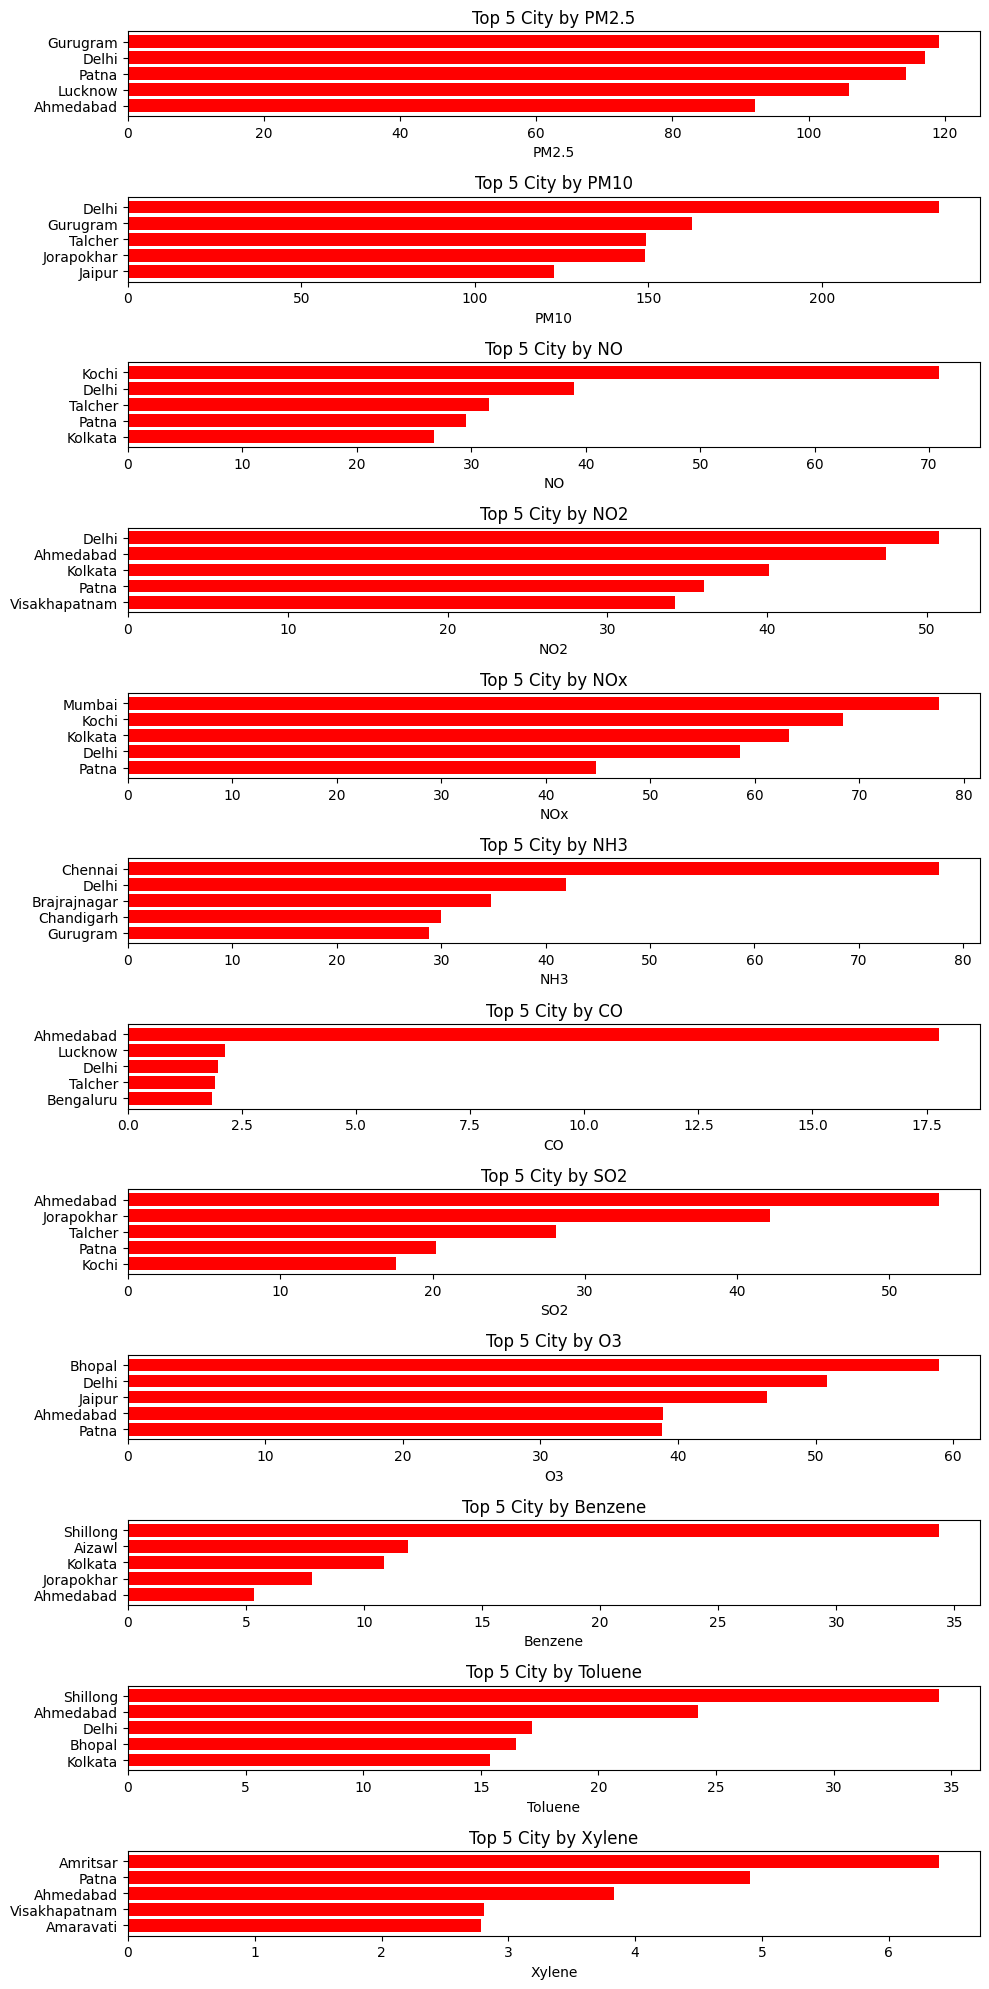

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

pollutant_columns = ['PM2.5','PM10','NO','NO2', 'NOx','NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']

# Step 1: Group by City and calculate mean pollutant concentrations
mean_pollutant_by_City = df.groupby('City')[pollutant_columns].mean()

# Step 2: Find the top 5 city for each pollutant
top_City = {}
for pollutant in pollutant_columns:
    top_City[pollutant] = mean_pollutant_by_City[pollutant].sort_values(ascending=False).head(5)

# Step 3: Plotting
fig, axes = plt.subplots(len(pollutant_columns), 1, figsize=(10, 20))

for i, pollutant in enumerate(pollutant_columns):
    axes[i].barh(top_City[pollutant].index, top_City[pollutant].values, color='red')
    axes[i].set_title(f'Top 5 City by {pollutant}')
    axes[i].set_xlabel(f'{pollutant}')
    axes[i].invert_yaxis()  # Highest values on top

plt.tight_layout()
plt.show()

In [ ]:
# Create a bar chart for the Average of each pollutant
import plotly.express as px

# Calculate the A verage of each pollutant
pollutants = ['PM2.5','PM10','NO','NO2', 'NOx','NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']
mean_pollutants = df[pollutants].mean()

# Create the bar chart
fig = px.bar(
    x=pollutants,
    y=mean_pollutants,
    title='Average of Each Pollutant',
    labels={'x': 'Pollutant', 'y': 'Average Concentration'}
)

fig.show()

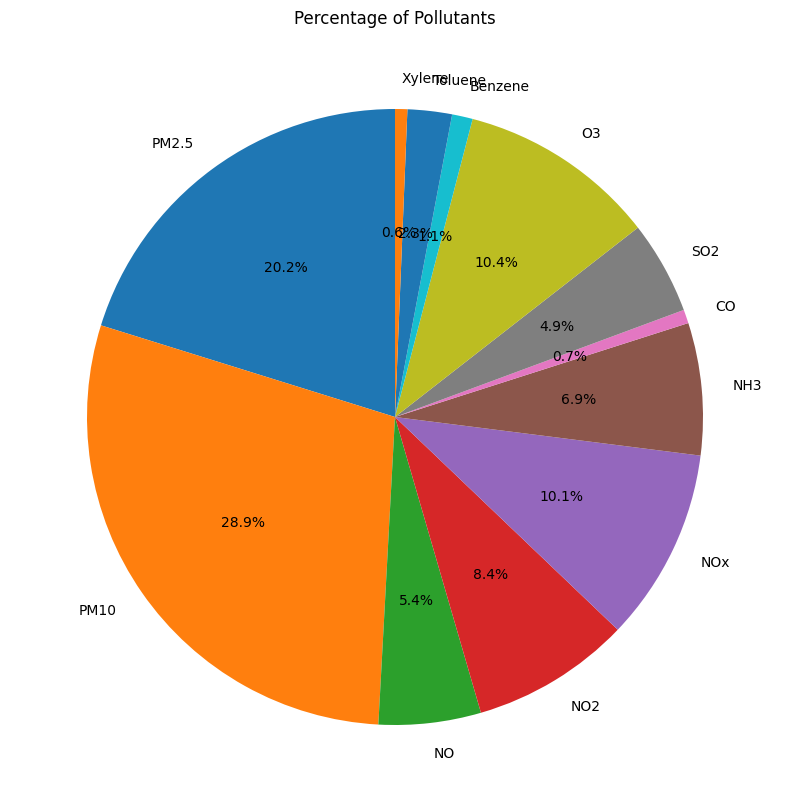

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'all_data' is your DataFrame
pollutants = ['PM2.5','PM10','NO','NO2', 'NOx','NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']
total_pollutant_concentration = df[pollutants].sum().sum()  # Calculates total concentration across all pollutants

# Calculate percentage for each pollutant
pollutant_percentages = [(df[pollutant].sum() / total_pollutant_concentration) * 100 for pollutant in pollutants]

# Create the pie chart
plt.figure(figsize=(10, 10))  # Adjust figure size if needed
plt.pie(pollutant_percentages, labels=pollutants, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Pollutants')
plt.show()

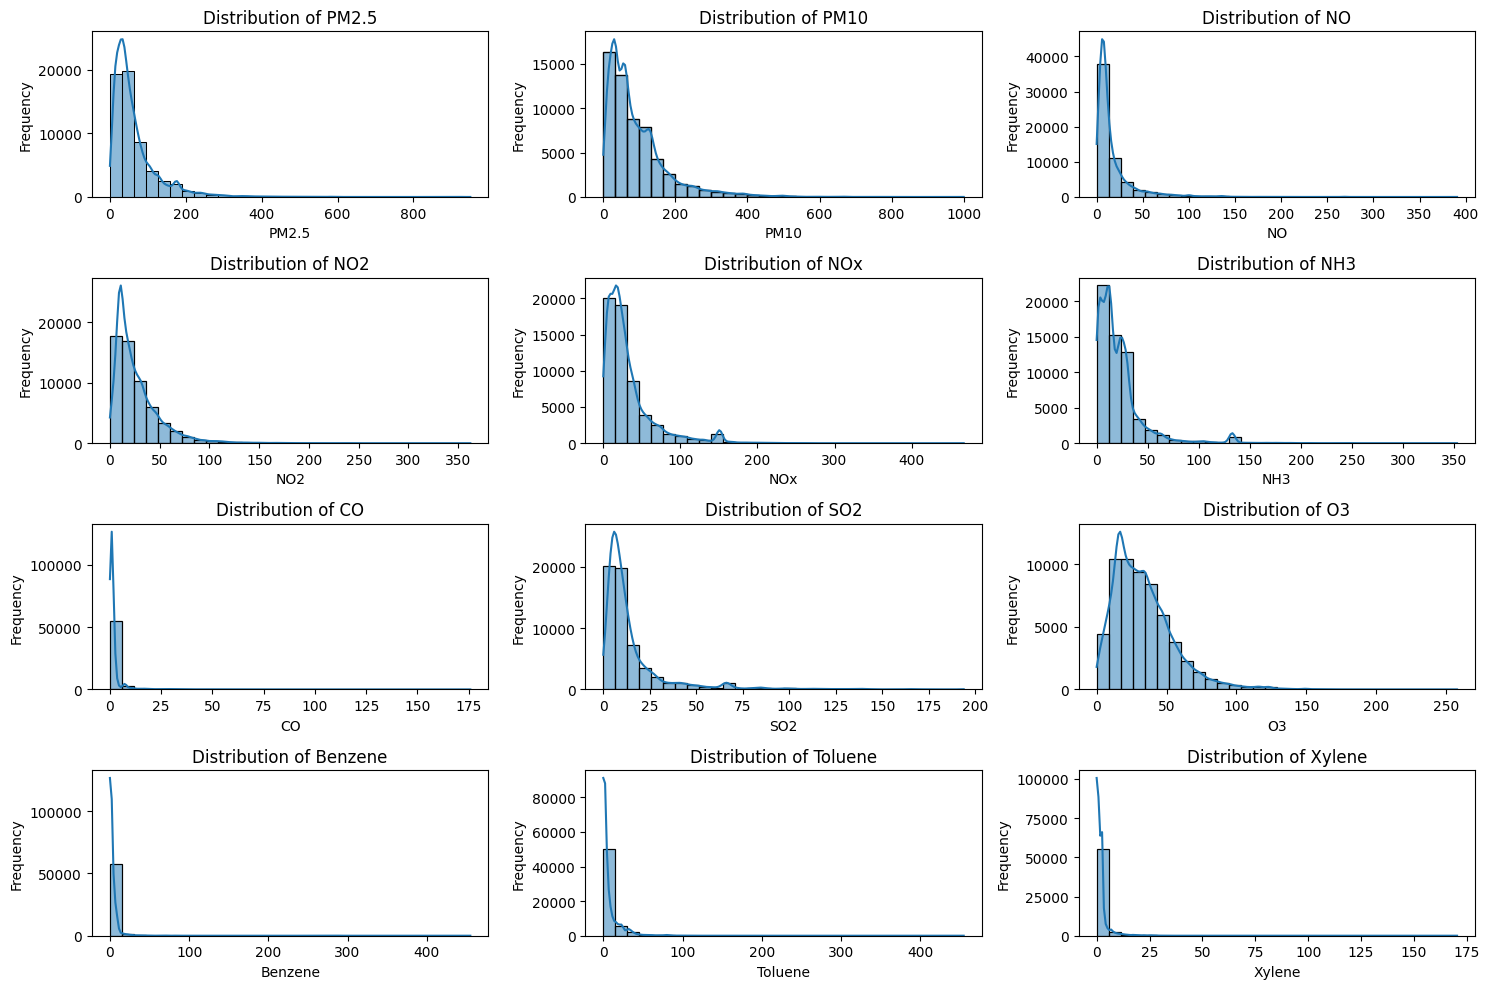

In [ ]:
# Visualizing the distribution of key variables using histograms
key_variables = ['PM2.5','PM10','NO','NO2', 'NOx','NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']

plt.figure(figsize=(15, 10))
for i, column in enumerate(key_variables, 1):

 plt.subplot(4, 3, i)
 sns.histplot(df[column], kde=True, bins=30)
 plt.title(f'Distribution of {column}')
 plt.xlabel(column)
 plt.ylabel('Frequency')
 plt.tight_layout()
plt.show()

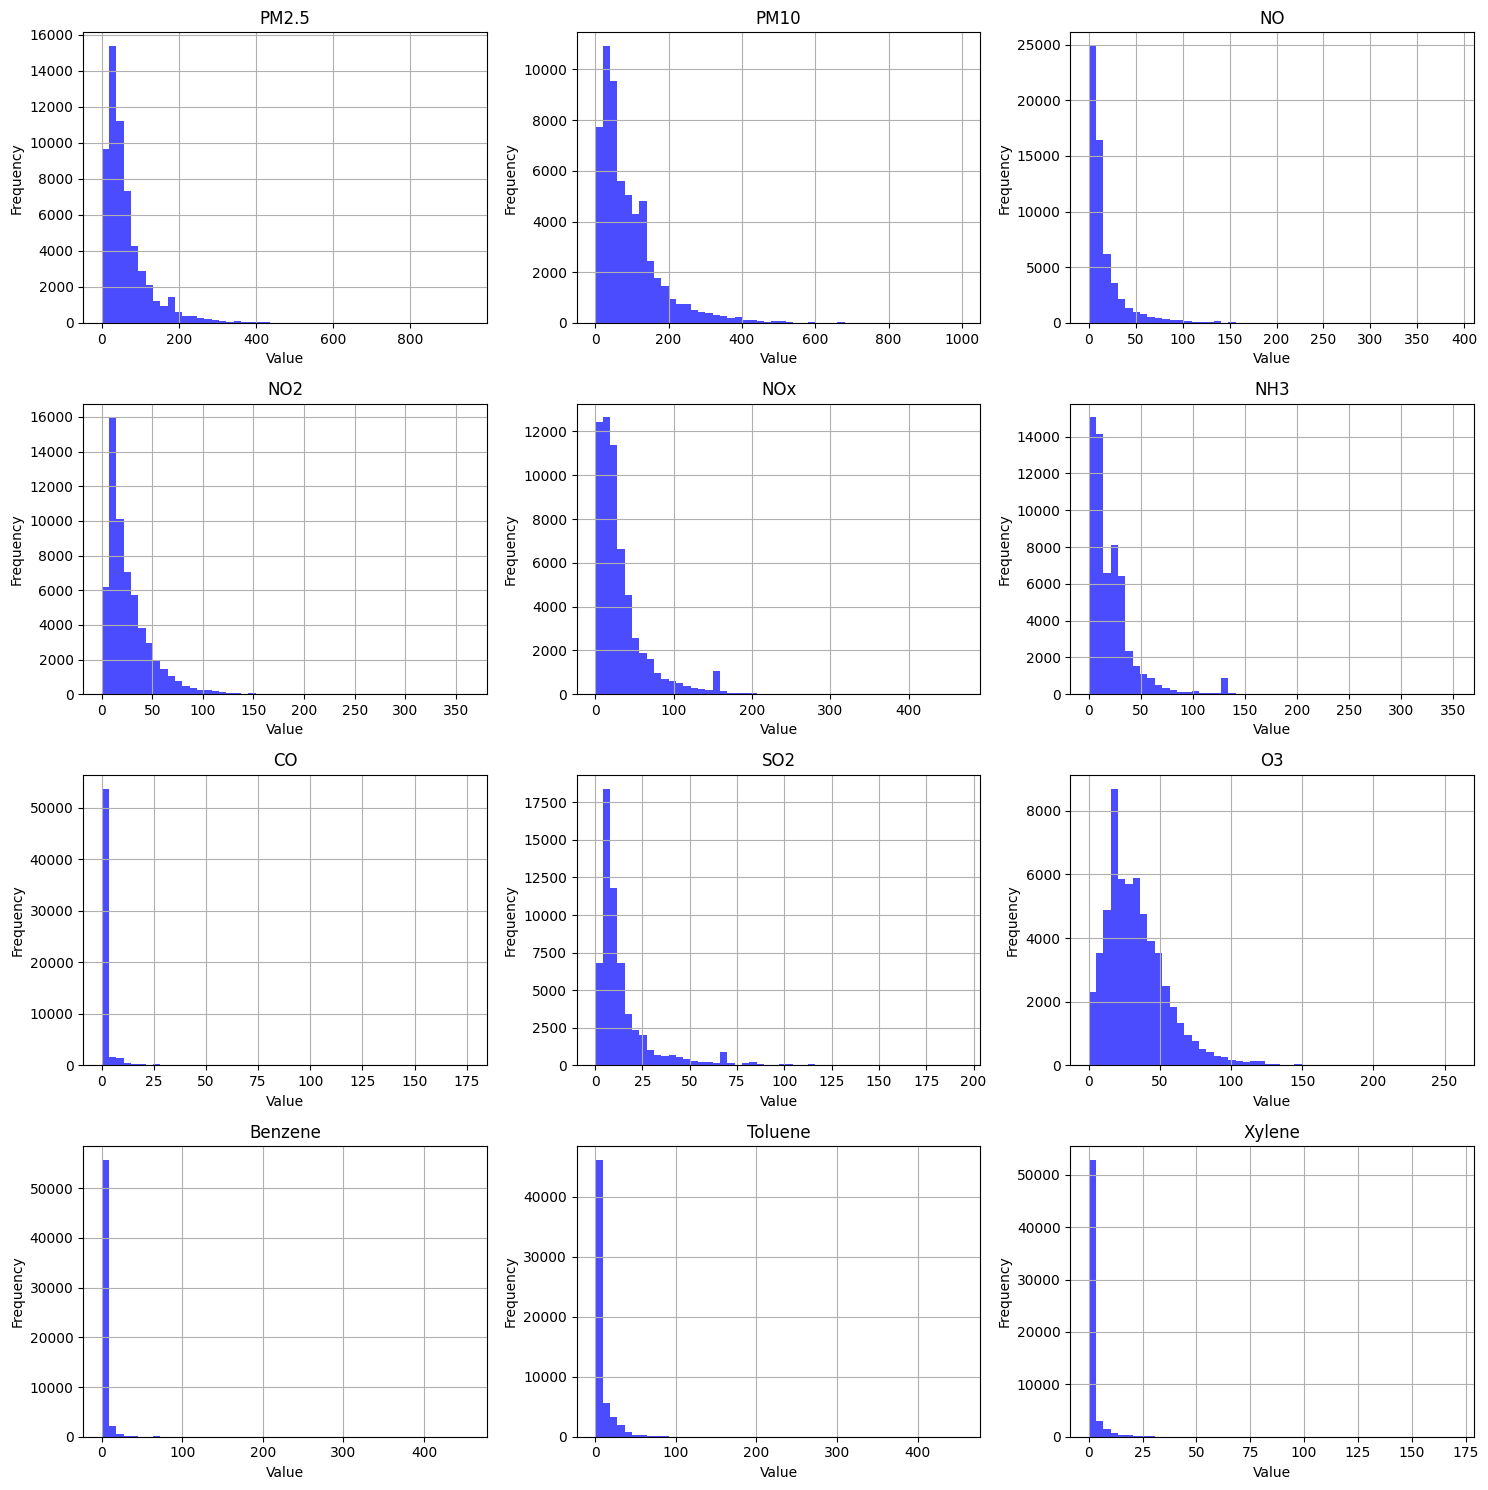

In [ ]:
import matplotlib.pyplot as plt


numerical_columns = ['PM2.5','PM10','NO','NO2', 'NOx','NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']


fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))
axes = axes.flatten()

for i, column in enumerate(numerical_columns):
    ax = axes[i]
    df[column].hist(bins=50, ax=ax, color='blue', alpha=0.7)
    ax.set_title(column)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')


for j in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

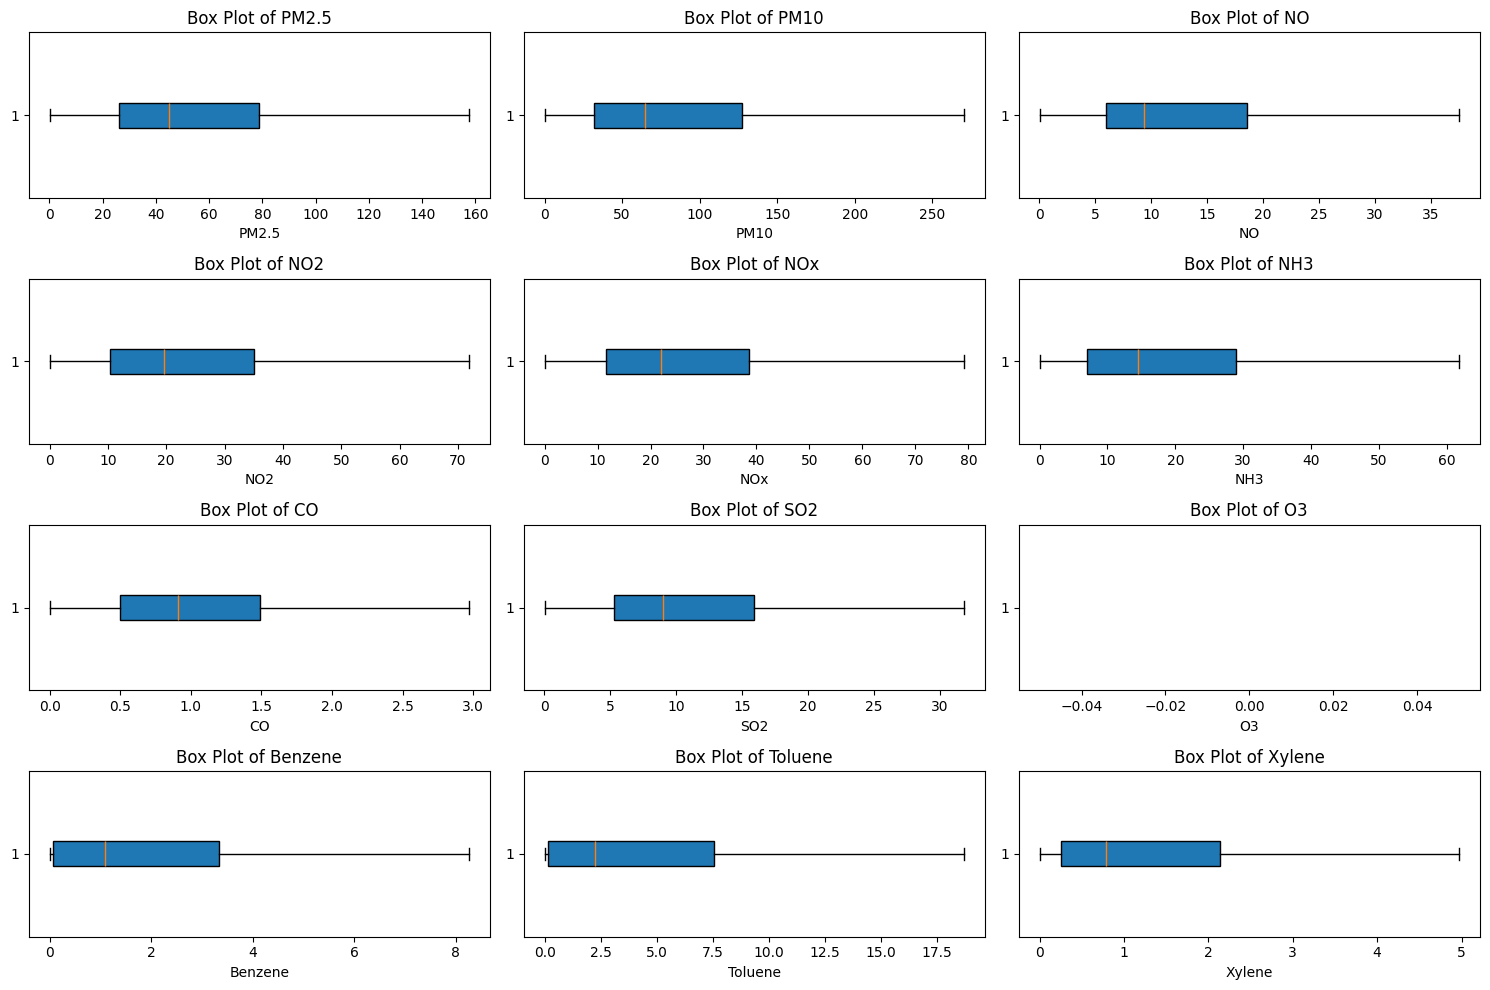

In [ ]:
# Define the pollutants to analyze
pollutants = ['PM2.5','PM10','NO','NO2', 'NOx','NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']

# Create a figure and subplots
fig, axes = plt.subplots(4, 3, figsize=(15, 10))  # 2 rows, 3 columns

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Create a box plot for each pollutant in a subplot
for i, pollutant in enumerate(pollutants):
    axes[i].boxplot(df[pollutant], vert=False, patch_artist=True, showfliers=False)
    axes[i].set_title(f'Box Plot of {pollutant}')
    axes[i].set_xlabel(pollutant)

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

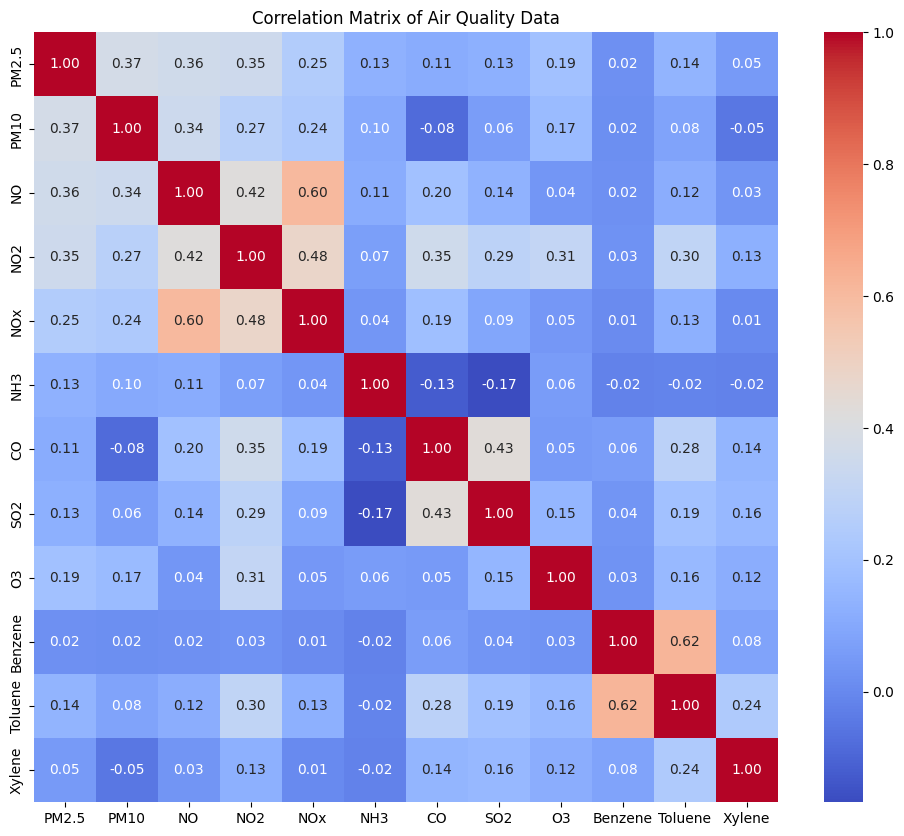

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation calculation
pollutants =df[['PM2.5','PM10','NO','NO2', 'NOx','NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']]

# Calculate the correlation matrix
correlation_matrix = pollutants.corr()

plt.figure(figsize=(12, 10))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Air Quality Data')
plt.show()

In [ ]:
pollutants.corr()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene
PM2.5,1.000000,0.371477,0.360520,0.351037,0.250520,0.129837,0.110845,0.125095,0.193655,0.020101,0.141368,0.054445
PM10,0.371477,1.000000,0.344631,0.273037,0.237151,0.104276,-0.082369,0.064940,0.166075,0.019016,0.079895,-0.049098
NO,0.360520,0.344631,1.000000,0.422336,0.604592,0.111288,0.195544,0.135201,0.041921,0.020733,0.115799,0.034776
NO2,0.351037,0.273037,0.422336,1.000000,0.477473,0.069076,0.354180,0.285528,0.306824,0.027210,0.299255,0.128943
NOx,0.250520,0.237151,0.604592,0.477473,1.000000,0.040702,0.185123,0.088099,0.045557,0.009698,0.127257,0.005146
NH3,0.129837,0.104276,0.111288,0.069076,0.040702,1.000000,-0.126134,-0.167483,0.059689,-0.020748,-0.016344,-0.020782
CO,0.110845,-0.082369,0.195544,0.354180,0.185123,-0.126134,1.000000,0.431301,0.054771,0.061782,0.279666,0.142953
SO2,0.125095,0.064940,0.135201,0.285528,0.088099,-0.167483,0.431301,1.000000,0.147445,0.036806,0.194618,0.157152
O3,0.193655,0.166075,0.041921,0.306824,0.045557,0.059689,0.054771,0.147445,1.000000,0.030608,0.163622,0.119248
Benzene,0.020101,0.019016,0.020733,0.027210,0.009698,-0.020748,0.061782,0.036806,0.030608,1.000000,0.619718,0.079994


In [ ]:
import numpy as np
# Select relevant columns for correlation analysis
corr_cols = ['PM2.5','PM10','NO','NO2', 'NOx','NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']
corr_matrix = df[corr_cols].corr()

# Create text annotations for percentages
text_annotations = np.around(corr_matrix.values, decimals=2)
text_annotations = text_annotations.astype(str)

# Creating heatmap
fig = go.Figure(data=go.Heatmap(
                   z=corr_matrix.values,
                   x=corr_cols,
                   y=corr_cols,
                   colorscale='Viridis',
                   hoverongaps = False,
                   text=text_annotations,  # Add text annotations
                   texttemplate="%{text}"  # Format text as percentages
                   ))

fig.update_layout(title='Correlation Matrix of Weather Conditions and Pollutants')
fig.show()